"""
Analytic solution for Robert Schiffman. Equations taken from Sun, et al, 2018, Mathematical Problems in Engineering (Article ID 9385615) https://doi.org/10.1155/2018/9385615

A linearly increasing compressive load is applied on the left side of a porous sample until a specified time t0, after which the face load is held constant. Zero displacement is specified on the right side. The porous matrix is fully saturated, and drainage is only allowed across the left side where the compressive load is applied. Fluid pressure on the drainage boundary is fixed at the initial pressure. The variables of interest here are the excess pore pressure and vertical strain as a function of time.
"""


In [5]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

In [6]:

def excess_pore_pressure(t, x_array, P0, Cv, L, t0, sum_size=100):
    """ Analytic solution for pressure

    Parameters
    -------------------
        t : float 
            Time in seconds
        x_array : numpy array
            x values of the domain
        P0 : float
            Inlet pressure
        Cv : float 
            coefficient of consolidation 
        L : float 
            Length (m)
        t0 : float
            Time in seconds at which the loading reaches max face load value of p0
        sum_size : int
            truncation length of infinite sum. Default = 100

    Returns 
    -----------------
        pressure : numpy array
            pressure solution 

    Notes
    -----------------
        Infinite sum is approximated using the first sum_size values
    
    """
    print("Computing pressure (Schiffman)")
    
    pressure = np.zeros_like(x_array)
    tv0 = Cv * t0 / ((L / 2)**2)
    tv = Cv * t / ((L / 2)**2)
    
    if t <= t0:
        for ix, x in enumerate(x_array):
            pressure[ix] = 0
            for n in range(sum_size):
                sum_value = np.sin((2*n+1) * np.pi * x / L) \
                       * (1.0 - np.exp(-(2*n+1)**2 * np.pi**2 * tv / 4.0)) / (2*n+1)**3 
                pressure[ix] += sum_value 
    
    else:
        for ix, x in enumerate(x_array):
            pressure[ix] = 0
            for n in range(sum_size):
                sum_value = np.sin((2*n+1) * np.pi * x / L) \
                       * np.exp(-(2*n+1)**2 * np.pi**2 * (tv - tv0) / 4.0) \
                       * (1.0 - np.exp(-(2*n+1)**2 * np.pi**2 * tv0 / 4.0)) / (2*n+1)**3 
                pressure[ix] += sum_value 
    
    pressure = 16.0 * (P0 / tv0) / np.pi**3 * pressure
    print("Computing pressure - done")
    return pressure

def vertical_strain(pressure, P0, E, v):
    """ Analytic solution for veritcal strain 

    Parameters
    -------------------
        pressure : numpy array 
            Pressure solution obtained from excess_pore_pressure function 
        P0 : float
            Inlet pressure
        E : float 
            Young's Modulus 
        v : float 
            Poisson's Ratio

    Returns 
    -----------------
        strain : numpy array
            vertical strain solution 

    Notes
    -----------------
        None 

    """
    print("\nComputing Strain")
    strain = np.zeros_like(pressure)
    strain = (pressure - P0) * ((1 - 2 * v) * (1 + v)) / (E * (1 - v))
    print("Computing Strain - done")
    return strain


In [21]:

t = 10
phi = 0.1  # porosity (dimensionless)
k = 3e-14  # permeability (m^2) 
mu = 0.001  # Water Viscosity (Pa*s)
K_l = 2.1e9  # Water Bulk Modulus (Pa)
v = 0.2 #Poissons Ratio (dimensionless)
E = 6.0e10 #Young's Modulus (Pa)

K_s = E / (1 - 2 * v**2 / (1 - v))  # Solid Bulk Modulus (Pa)
sm = (1.0 - phi) / K_s + phi / K_l  # constrained specific storage
Cv = k / mu / (sm + 1.0 / K_s) # coefficient of consolidation 

# Model Parameters 
L = 48 #length of the domain (m)
#t = 200 # simulation time (s)
t0 = 100.0 #time to reach max inlet pressure (s)
dx = 0.1  # spacing of grid points (m)
Nx = np.ceil(L / dx).astype(int)  # number of grid points
x_array = np.linspace(dx, L/2, Nx)

dPdt = 1e6  # slope of the external loading at the left end of domain (Pa/s)
P0 = dPdt * t0 / (K_s * (sm + 1.0 / K_s)) # max. external loading at the left end of domain

print("\nParameters")
print("--------------------------------------")
print(f"Inlet pressure\t\t{P0} [Pa]")
print(f"Permeability\t\t{k} [m^2]")
print("")
pressure = excess_pore_pressure(t, x_array, P0, Cv, L, t0)
epsilon = vertical_strain(pressure, P0, E, v)

   




Parameters
--------------------------------------
Inlet pressure		19705974.35095402 [Pa]
Permeability		3e-14 [m^2]

Computing pressure (Schiffman)
Computing pressure - done

Computing Strain
Computing Strain - done


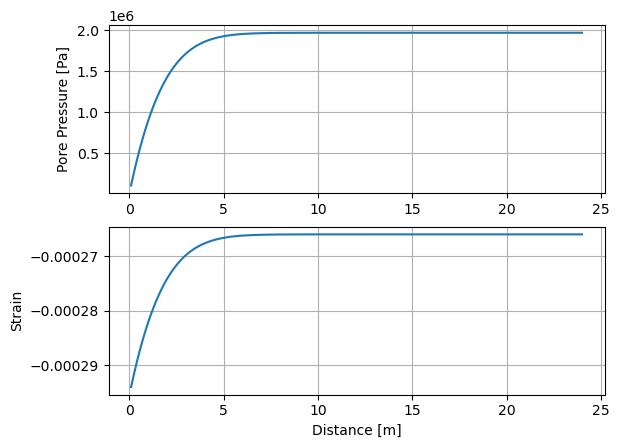

In [23]:
fig,ax = plt.subplots(nrows = 2)
ax[0].plot(x_array, pressure)
ax[0].set_ylabel("Pore Pressure [Pa]")
ax[0].grid(True)
ax[1].plot(x_array, epsilon)
ax[1].set_ylabel("Strain")
ax[1].grid(True)
plt.xlabel("Distance [m]")
plt.show()